In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from resources.models import xgboost, random_forest, loaded_model
from resources.functions.model_functions import get_stacked_model, compare_models

plt.style.use('seaborn')

In [3]:
csv_file_list = []
for file in os.listdir('cleaned-data/'):
    if '.csv' in file:
        csv_file_list.append(file)
csv_file_list

['dum-zscore-cross-stan.csv',
 'dum-zscore.csv',
 'dum-zscore-cross.csv',
 'dum-zscore-nor.csv',
 'nor-dum-zscore-1.csv',
 'dum-zscore-cross-nor.csv',
 'dum-zscore-stan.csv']

In [5]:
models = {
    'XGboost': xgboost,
    'RandomForest': random_forest,
    'RandomForestOptimized': loaded_model,
    'Stacking': get_stacked_model(),
}

file:  dum-zscore-cross-stan.csv
>>> XGboost 0.9640 (0.0131)
>>> RandomForest 0.9659 (0.0127)
>>> RandomForestOptimized 0.9670 (0.0142)
>>> Stacking 0.9619 (0.0194)


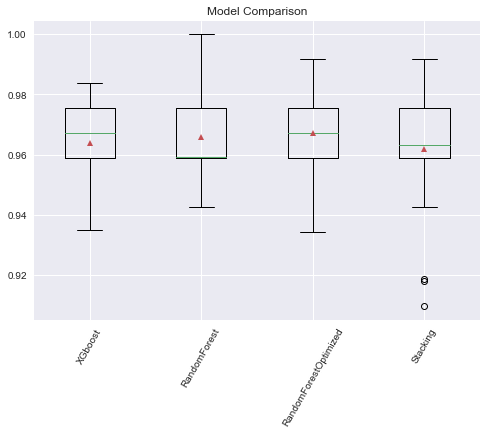

file:  dum-zscore.csv
>>> XGboost 0.9612 (0.0154)
>>> RandomForest 0.9561 (0.0167)
>>> RandomForestOptimized 0.9553 (0.0172)
>>> Stacking 0.9639 (0.0149)


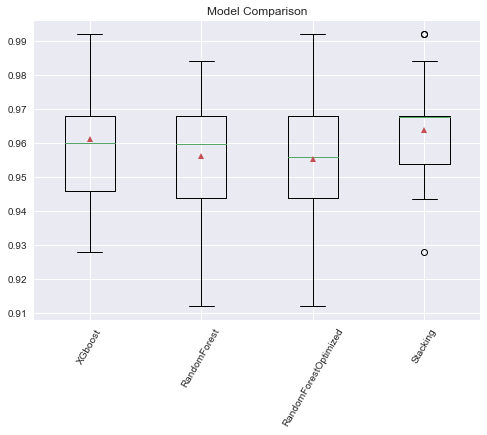

file:  dum-zscore-cross.csv
>>> XGboost 0.9557 (0.0175)
>>> RandomForest 0.9639 (0.0150)
>>> RandomForestOptimized 0.9639 (0.0141)
>>> Stacking 0.9619 (0.0144)


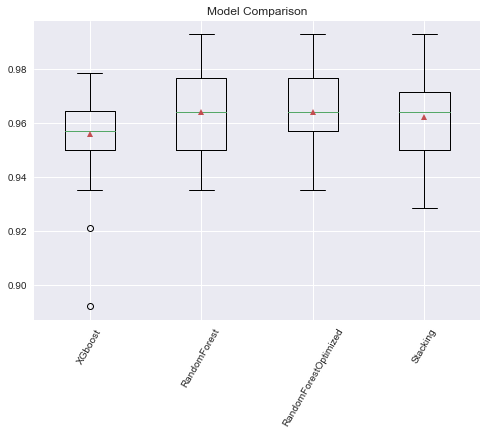

file:  dum-zscore-nor.csv
>>> XGboost 0.9650 (0.0137)
>>> RandomForest 0.9446 (0.0181)
>>> RandomForestOptimized 0.9426 (0.0179)


KeyboardInterrupt: 

In [6]:
for train_csv in csv_file_list:
    df_train = pd.read_csv(f'cleaned-data/{train_csv}', index_col=0)
    y = df_train.Target.values
    X = df_train.drop(axis=1, columns='Target')
    print('file: ', train_csv)
    compare_models(models, X, y)